In [32]:
import os 
import re #regular expression
import pandas as pd 
import matplotlib.pyplot as plt
path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon'
files=os.listdir(path)
files_dat =[]
files_dat = [f for f in files if f[-4:] == '.dat']
dunsort=[]
Tika=[]
Nka=[]
Sika=[]
energy=[]
thickness=[]
for s in files_dat:
    newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in s)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    energy.append(listOfNumbers[0])
    thickness.append(listOfNumbers[1])
    f = open(path+'\\'+s,'r')
    text = f.read()
    x=re.findall('ABS: (\d+....|\d+|\d+.|\d+..|\d+...)|(Ti|N|Si)',text)
    dunsort.append(x)
    if len(x)==7:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(float(x[6][0]))
    elif len(x)==4:
        try:
            Tika.append(float(x[1][0]))
            Nka.append(float(x[3][0]))
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
        except(ValueError):
            Tika.append(float(x[1][0]))
            Nka.append(0.0)
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
    elif len(x)==5:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(0.0)

In [33]:
print(len(energy),len(Tika),len(Sika),len(Nka))

1386 1386 1386 1386


In [34]:
dic_data={'Energy':energy,'Thickness':thickness,'Tika':Tika,'Sika':Sika,'Nka':Nka}
df=pd.DataFrame(dic_data)
df.head(30)

,Energy,Thickness,Tika,Sika,Nka
0,10,100,249.659,1643.350,122.710
1,10,1020,586.205,0.000,349.817
2,10,1080,584.736,0.000,349.042
3,10,1140,586.191,0.000,349.683
4,10,1200,585.677,0.000,348.364
5,10,120,301.466,1460.620,147.343
6,10,1280,585.640,0.000,349.216
7,10,1360,583.949,0.000,348.896
8,10,140,352.579,1252.000,175.668
9,10,1440,585.930,0.000,349.865


In [35]:
c=list(df.query('Energy==10').Thickness.sort_values())
len(c)
print(c)

[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1280, 1360, 1440, 1520, 1600, 1680, 1760, 1840, 1920, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4200, 4400, 4600, 4800, 5000]


In [36]:
df['I_ratio']=df.Sika/df.Tika
df.sort_values('Energy').sort_values('Thickness')

,Energy,Thickness,Tika,Sika,Nka,I_ratio
1076,26,20,42.439,9236.86,9.277,217.650275
878,23,20,44.388,8101.79,10.133,182.522078
482,17,20,46.444,5607.81,13.024,120.743476
152,12,20,45.926,3324.56,17.363,72.389496
1208,28,20,41.952,9875.85,8.837,235.408324
...,...,...,...,...,...,...
1374,30,5000,6911.910,0.00,246.834,0.000000
54,10,5000,586.052,0.00,350.217,0.000000
516,17,5000,2432.180,0.00,363.198,0.000000
1110,26,5000,5489.010,0.00,283.177,0.000000


In [38]:
df1=df.set_index(['Thickness','Energy']).sort_index()
#df1.to_excel(path+'\\'+'Matrix_TiN_on_Si.xlsx',sheet_name='Th|E|I_r')
df2=df.set_index(['Energy','Thickness']).sort_index()

In [271]:
with pd.ExcelWriter(path+'\\'+'Matrix_TiN_on_Si.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Thickness-Energy-I_r')
    df2.to_excel(writer, sheet_name='Energy-Thickness-I_r')

In [45]:
df1

Tika     Sika      Nka    I_ratio
Thickness Energy                                       
20        10        41.825  2431.24   19.659  58.128870
          11        44.228  2878.39   18.670  65.080718
          12        45.926  3324.56   17.363  72.389496
          13        46.965  3784.65   16.109  80.584478
          14        47.337  4248.23   15.198  89.744386
...                    ...      ...      ...        ...
5000      26      5489.010     0.00  283.177   0.000000
          27      5852.750     0.00  271.027   0.000000
          28      6211.420     0.00  267.093   0.000000
          29      6578.620     0.00  252.658   0.000000
          30      6911.910     0.00  246.834   0.000000

[1386 rows x 4 columns]

In [39]:
df1.loc[3800,:]

,Tika,Sika,Nka,I_ratio
Energy,,,,
10,586.501,0.000,352.701,0.000000e+00
11,801.028,0.000,363.294,0.000000e+00
12,1035.580,0.000,372.247,0.000000e+00
13,1285.080,0.000,373.274,0.000000e+00
14,1550.740,0.000,373.300,0.000000e+00
15,1841.820,0.000,374.285,0.000000e+00
16,2133.980,0.000,370.531,0.000000e+00
17,2441.240,0.000,364.483,0.000000e+00
18,2756.730,0.000,355.512,0.000000e+00


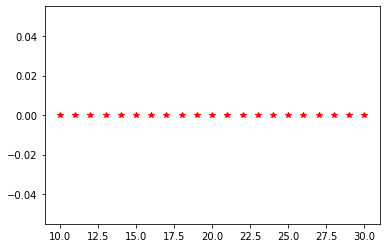

In [43]:
plt.plot(df[df.Thickness==2200].Energy,df[df.Thickness==2200].Sika,'r*')
#plt.xlim([0,1000])

In [256]:
df.sort_values('Thickness')

,Energy,Thickness,Tika,Sika,Nka,I_ratio
679,20,20,45.606,6883.24,11.234,150.928387
86,11,20,44.228,2878.39,18.670,65.080718
1339,30,20,39.960,10509.00,8.116,262.987988
745,21,20,45.057,7296.14,10.939,161.931331
218,13,20,46.965,3784.65,16.109,80.584478
...,...,...,...,...,...,...
318,14,5000,1550.990,0.00,374.156,0.000000
647,19,5000,3075.710,0.00,346.258,0.000000
120,11,5000,799.000,0.00,362.297,0.000000
54,10,5000,586.052,0.00,350.217,0.000000


In [213]:
df[df.Energy==20].Thickness

658     100
659    1020
660    1080
661    1140
662    1200
       ... 
719     780
720      80
721     840
722     900
723     960
Name: Thickness, Length: 66, dtype: int64

In [10]:
import os 
import pandas as pd 

path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon'
files=os.listdir(path)
files_dat =[]
files_dat = [f for f in files if f[-4:] == '.dat']

df=pd.DataFrame()

for s in files_dat:
    datanew=[]
    datContent = [i.strip().split() for i in open(path+'\\'+s).readlines()]
    for i in datContent:
        if len(i)==4 or (len(i)==3 and i[0]=='PRZ'):
            datanew.append(i)
            if len(datanew)==3:
                datanew.append([1])
            else: 
                continue
        else:
            continue
    df=df.append(datanew)

In [162]:
import os 
import re #regular expression
import pandas as pd 
path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon'
s='Auto_TiNonSi_10_KV_100_nm.dat'
datanew=[]
datadic={}
energy=[]
thickness=[]
datContent = [i.strip().split() for i in open(path+'\\'+s).readlines()]
#print(datContent)
f = open(path+'\\'+s,'r')
text=f.read()
#print(text)
x=re.findall('ABS: (\d+...)|(Ti|N|Si)',text)
print(x)
names=[]
intensities=[]
for tuples in x:
    print(tuples)
    if tuples[0]=='':
        names.append(tuples[1])
    else:
        intensities.append(float(tuples[0]))
    
print(intensities,names,datadic)

[('', 'Ti'), ('249.65', ''), ('87.57', ''), ('', 'N'), ('122.71', ''), ('', 'Si'), ('1643.35', '')]
('', 'Ti')
('249.65', '')
('87.57', '')
('', 'N')
('122.71', '')
('', 'Si')
('1643.35', '')
[249.65, 87.57, 122.71, 1643.35] ['Ti', 'N', 'Si'] {}


In [164]:
x[4]

('122.71', '')

In [159]:
newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in 'Auto_TiNonSi_10_KV_100_nm.dat')#toma los numeros del nombre del archivo
listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
listOfNumbersbers

[10, 100]

In [122]:
f = open(path+'\\'+s,'r')
text=f.read()


In [104]:
dic={}
l=[]
s=['j','a','n','a']
for i in range(0,4):
    l.append(i)
dic['numeros']=l
dic
df=pd.DataFrame(dic,index=s)
df

,numeros
j,0
a,1
n,2
a,3


In [47]:
c=df.loc[1][3]
d=c.tolist()

In [17]:
df

,0,1,2,3
0,PRZ,of,Ti,None
1,Ka1:,1883.69,ABS:,1841.82
2,La1:,820.378,ABS:,156.627
3,1,None,None,None
4,PRZ,of,N,None
...,...,...,...,...
3,1,None,None,None
4,PRZ,of,N,None
5,Ka1:,803.534,ABS:,220.324
6,PRZ,of,Si,None


In [11]:
len(datContent)

1513

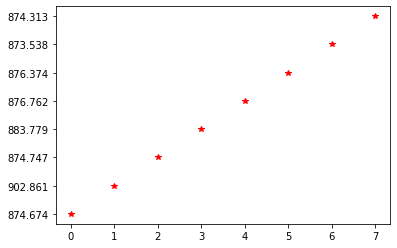

In [51]:
import matplotlib.pyplot as plt 
plt.plot(d,'*r')

In [56]:
d=c.tolist()
nums=list(map(int,d))

ValueError: invalid literal for int() with base 10: '874.674'

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [22]:
import re 

txt = "The rain in Spain"
x = re.search("The", txt) 
print(x[0])

The
